In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Fichiers CSV/notes.csv')

In [114]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


# Analyses univariées et bivariées

## Les données sont en mm
- diagonal = diagonale de billet 
- height_left = hauteur du billet mesurée sur la gauche
- height_right = hauteur du billet mesurée sur la droite
- margin_up = marge entre le bord supérieur et l'image 
- margin_low = marge entre le bord inférieur et l'image
- length = longueur du billet
- is_genuine = est authentique

## Analyse de la forme

- Variable cible : is_genuine : Témoigne de la véracité ou non d'un billet
- Nombre lignes/colonnes : 170 lignes (100 vrais et 70 faux) et 7 colonnes
- Types de variables : is_genuine est booléenne, les autres sont numériques
- Valeurs manquantes : Aucune

## Analyse de fond

- Outliers : 5 sur les boxplots : Cela ne concerne jamais le même billet
- is_genuine est fortement corrélée linéairement avec length et margin_low
    - Les longueurs des faux billets sont bien plus petites que celles des vrais
    - Les marges inférieurs des faux billets sont bien plus grandes que celles des vrais
- height_right et height_left sont corrélées linéairement

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [5]:
df.shape

(170, 7)

In [6]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [7]:
df.duplicated().sum()

0

In [8]:
# Aucun billet identique

In [9]:
df.is_genuine.value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

In [10]:
# 100 vrais billets et 70 faux

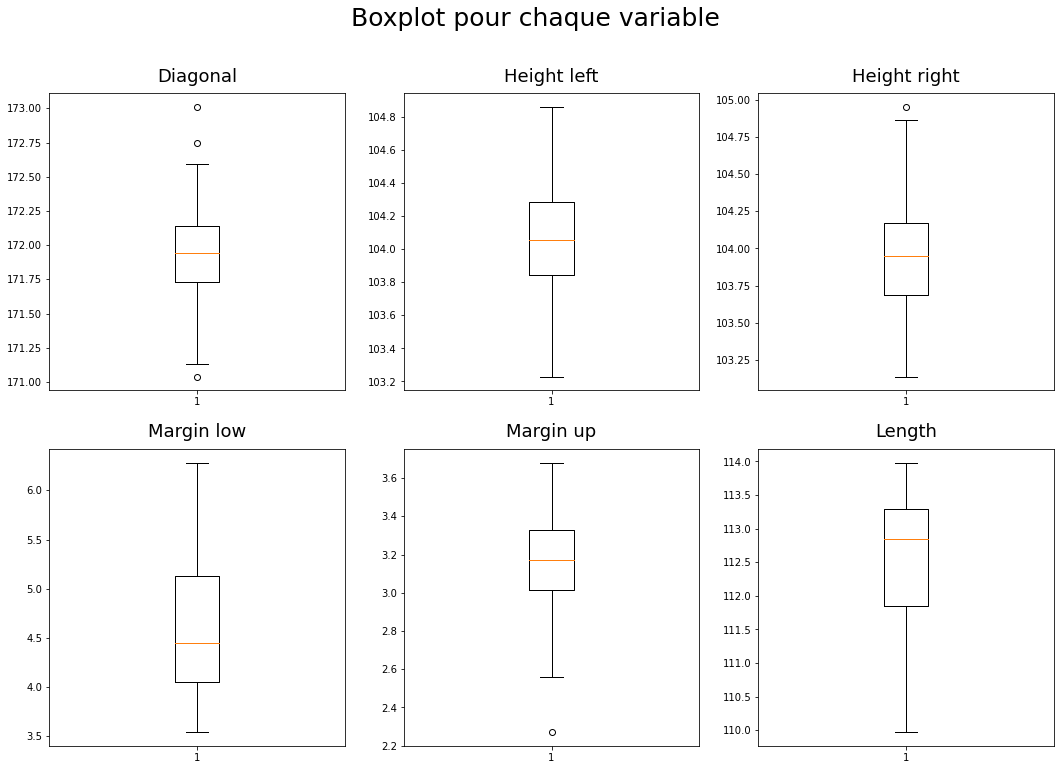

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(18,12))

ax[0,0].boxplot(df.diagonal)
ax[0,0].set_title('Diagonal', fontsize=18, y=1.02)

ax[0,1].boxplot(df.height_left)
ax[0,1].set_title('Height left', fontsize=18, y=1.02)

ax[0,2].boxplot(df.height_right)
ax[0,2].set_title('Height right', fontsize=18, y=1.02)

ax[1,0].boxplot(df.margin_low)
ax[1,0].set_title('Margin low', fontsize=18, y=1.02)

ax[1,1].boxplot(df.margin_up)
ax[1,1].set_title('Margin up', fontsize=18, y=1.02)

ax[1,2].boxplot(df.length)
ax[1,2].set_title('Length', fontsize=18, y=1.02)

fig.suptitle('Boxplot pour chaque variable', fontsize=25)

plt.savefig('P6_01_boxplot_var.jpeg')

plt.show()

In [12]:
df[df['diagonal'] > 172.6]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
34,True,172.75,104.33,103.97,4.34,3.14,113.12
166,False,173.01,104.59,104.31,5.04,3.05,110.91


In [13]:
df[df['diagonal'] < 171.1]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
70,True,171.04,103.84,103.64,4.22,3.36,112.7


In [14]:
df[df['height_right'] > 104.9]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83


In [15]:
df[df['margin_up'] < 2.4]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
4,True,172.05,103.7,103.75,5.04,2.27,113.55


In [16]:
df.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.139223,-0.461730,-0.551309,-0.800111,-0.582801,0.825743
diagonal,0.139223,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,-0.461730,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,-0.551309,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.800111,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.582801,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.825743,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


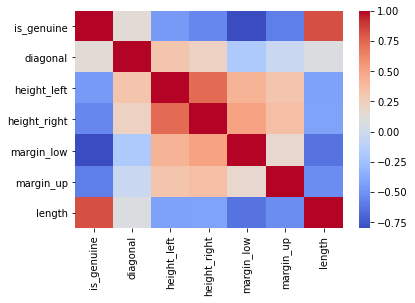

In [17]:
ax = sns.heatmap(df.corr(), cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.savefig('P6_02_heatmap_corr.jpeg')

In [18]:
# Corrélation positive forte entre is_genuine et length
# Corrélation négative forte entre is_genuine et margin_low
# Corrélation entre height_right et haight_left (relativement logique)

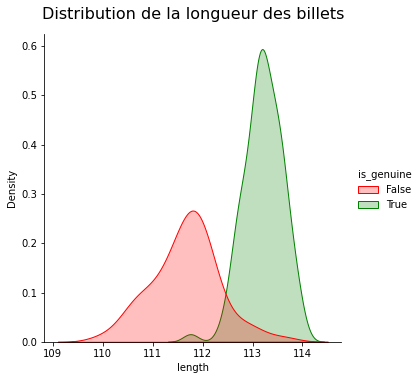

In [19]:
sns.displot(data = df, x = 'length', hue = 'is_genuine', palette = ['r', 'g'], 
            kind='kde', fill=True)

plt.title('Distribution de la longueur des billets', fontsize=16, y=1.03)

plt.savefig('P6_03_distrib_length.jpeg')

plt.show()

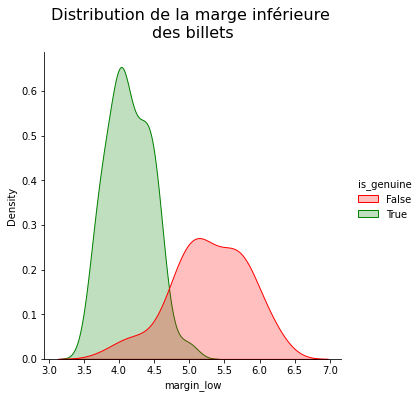

In [20]:
sns.displot(data = df, x = 'margin_low', hue = 'is_genuine', palette = ['r', 'g'], 
            kind='kde', fill=True)

plt.title('Distribution de la marge inférieure \ndes billets', fontsize=16, y=1.03)

plt.savefig('P6_04_distrib_margin_low.jpeg')

plt.show()

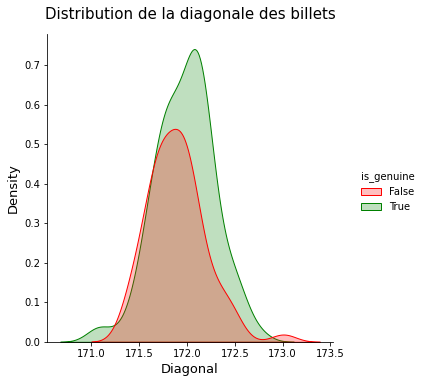

In [21]:
sns.displot(data = df, x = 'diagonal', hue = 'is_genuine', kind = 'kde', palette=['r', 'g'], 
            fill=True)

plt.xlabel('Diagonal', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title('Distribution de la diagonale des billets', fontsize=15, y=1.03)

plt.savefig('P6_05_distrib_diagonal.jpeg')

plt.show()

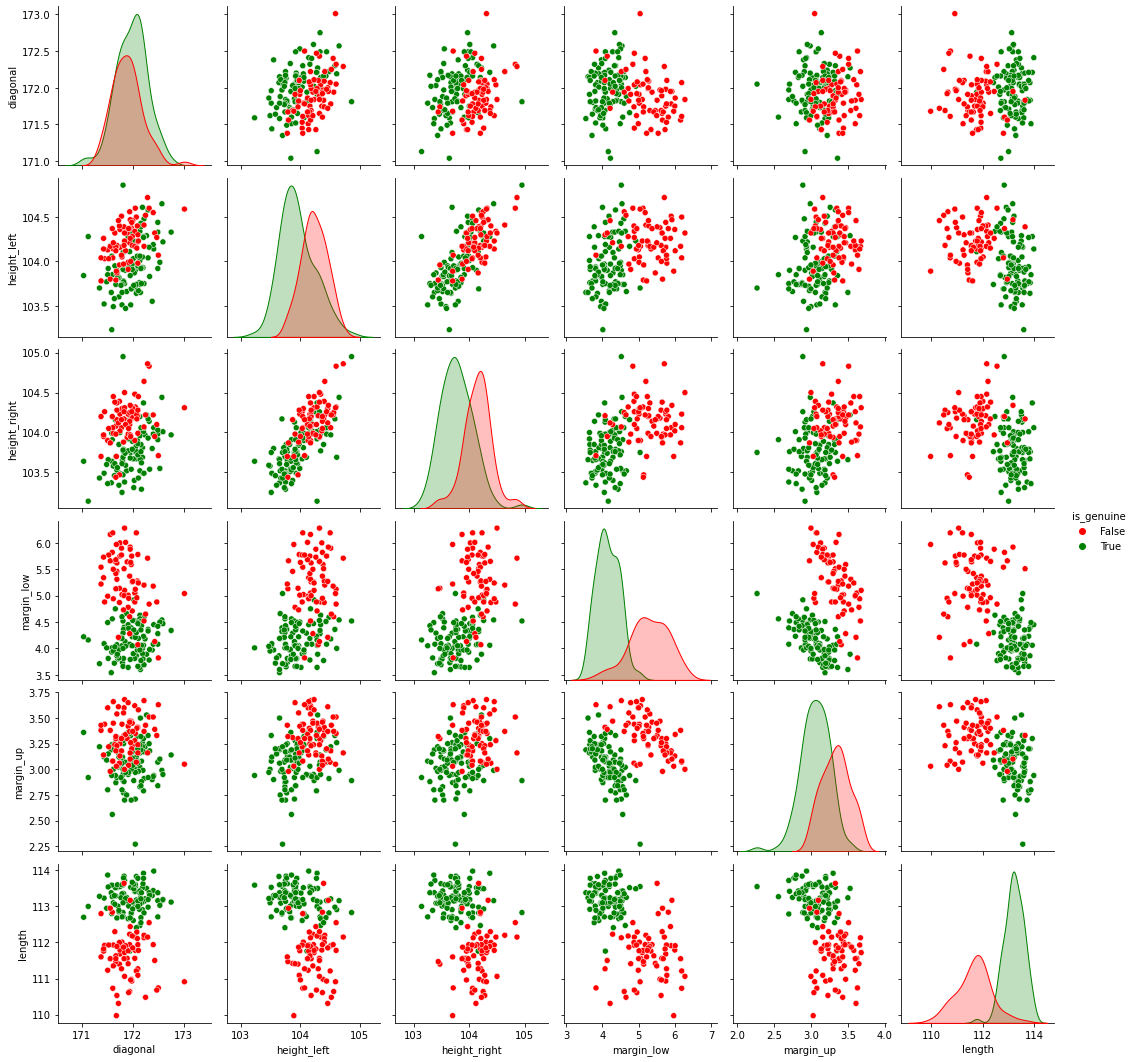

In [22]:
sns.pairplot(df, hue='is_genuine', palette=['r', 'g'])
plt.show()

## Test de comparaison sur la variable diagonal entre les faux et vrais billets

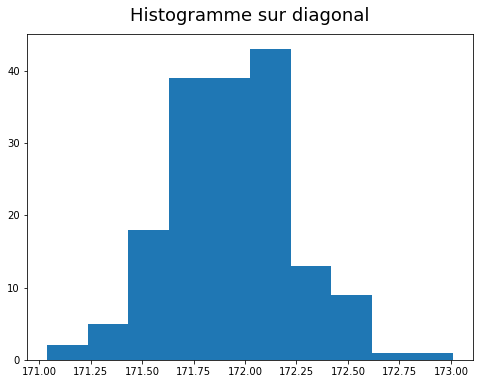

In [23]:
plt.figure(figsize=(8,6))
plt.hist(df.diagonal)
plt.title('Histogramme sur diagonal', fontsize=18, y=1.02)
plt.savefig('P6_06_hist_diag.jpeg')
plt.show()

## Hypothèses:
- H0 : diagonal suit une loi normale
- H1 : diagonal ne suit pas une loi normale

In [24]:
from scipy.stats import kstest
diag_norm = (df['diagonal'].values - np.mean(df['diagonal'].values, axis=0))/np.std(df['diagonal'].values, axis=0)
kstest(diag_norm, 'norm')

KstestResult(statistic=0.04104225708371484, pvalue=0.9255821909685329)

In [25]:
# On ne rejette pas l'hypothèse HO (p = 0.92 > 0.05). Diagonal suit une loi normale.

## Comparaison entre les diagonales des faux et des vrais billets

In [26]:
diag_v = df[df.is_genuine == True].diagonal
diag_f = df[df.is_genuine == False].diagonal

H0 : var_diag_v = var_diag_f

In [27]:
from scipy.stats import f
f_distrib = f(len(diag_v) - 1, len(diag_f) - 1)
f_stat = np.var(diag_v, ddof=1) / np.var(diag_f, ddof=1)
p_value = 2 * min(f_distrib.cdf(f_stat), 1 - f_distrib.cdf(f_stat))

In [28]:
p_value

0.7644664495308113

In [29]:
# On ne rejette pas l'hypothèse H0.

H0 : mean_diag_v = mean_diag_f

In [30]:
from scipy.stats import ttest_ind
ttest_ind(diag_v, diag_f, equal_var = True)

Ttest_indResult(statistic=1.8222865515506024, pvalue=0.07018967008887296)

In [31]:
# On ne rejette pas l'hypothèse H0.

## Conclusion
- Ces deux échantillons gaussiens suivent la même loi.
- La variable diagonal n'a pas un impact significatif sur la véracité d'un billet.

## On retire la variable diagonal

# ACP

In [32]:
# Deux clusters : Authentiques et faux
n = df.shape[0]
p = df.iloc[:, 1:].shape[1]

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_norm = sc.fit_transform(df.iloc[:, 1:])

In [34]:
df_norm

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

In [35]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver = 'full')

In [36]:
coord = acp.fit_transform(df_norm)

In [37]:
coord

array([[ 2.15363875,  1.59970945,  1.78745079,  2.43346523,  0.69968952,
        -1.26770217],
       [-2.11041589, -0.52603892,  0.54256277,  0.34454951,  0.0674404 ,
        -0.54460079],
       [-1.97315242, -0.04810178,  0.85871563,  0.37481231, -0.4248861 ,
         0.08048667],
       ...,
       [ 2.06724502,  0.84560244, -0.61028227, -1.71417169,  0.1169579 ,
        -0.50433787],
       [ 0.73925685, -0.97296457, -1.35977212, -0.19173617, -0.24355701,
         0.21142914],
       [ 1.50499242, -1.07972486,  0.18888855, -1.34755225, -0.2891493 ,
        -0.06034599]])

In [38]:
coord**2

array([[4.63815987e+00, 2.55907031e+00, 3.19498033e+00, 5.92175300e+00,
        4.89565430e-01, 1.60706879e+00],
       [4.45385524e+00, 2.76716945e-01, 2.94374363e-01, 1.18714362e-01,
        4.54820714e-03, 2.96590018e-01],
       [3.89333047e+00, 2.31378154e-03, 7.37392525e-01, 1.40484270e-01,
        1.80528200e-01, 6.47810418e-03],
       ...,
       [4.27350197e+00, 7.15043491e-01, 3.72444450e-01, 2.93838459e+00,
        1.36791513e-02, 2.54356689e-01],
       [5.46500686e-01, 9.46660047e-01, 1.84898021e+00, 3.67627598e-02,
        5.93200176e-02, 4.47022820e-02],
       [2.26500220e+00, 1.16580577e+00, 3.56788833e-02, 1.81589707e+00,
        8.36073155e-02, 3.64163899e-03]])

In [39]:
acp.components_

array([[ 0.07327499,  0.47550205,  0.4918214 ,  0.43102671,  0.35253984,
        -0.46537288],
       [ 0.77963908,  0.33925019,  0.23554253, -0.32053699, -0.14111974,
         0.31453645],
       [-0.08889419,  0.12276016,  0.15383022,  0.5128076 , -0.82114881,
         0.12691346],
       [-0.55973158,  0.2780463 ,  0.45893794, -0.22652773,  0.13533955,
         0.57370304],
       [-0.22509444,  0.71592059, -0.48699285, -0.31190784, -0.1939426 ,
        -0.25441684],
       [ 0.12216606,  0.23213146, -0.4808135 ,  0.54763041,  0.35437971,
         0.52395111]])

In [40]:
var_axes = acp.singular_values_**2/n
acp.explained_variance_ratio_

array([0.47447921, 0.21957106, 0.14234524, 0.08526295, 0.04612822,
       0.03221331])

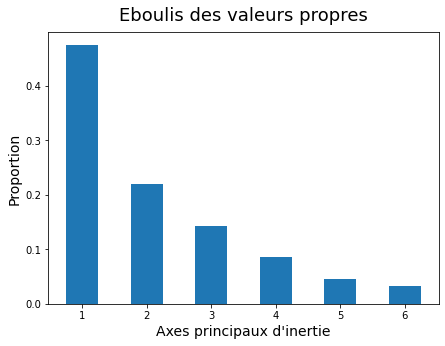

In [41]:
plt.figure(figsize=(7,5))
plt.bar([1, 2, 3, 4, 5, 6], acp.explained_variance_ratio_, width=0.5)
plt.title('Eboulis des valeurs propres', y=1.02, fontsize=18)
plt.xlabel("Axes principaux d'inertie", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.show()

In [42]:
# Le premier axe regroupe la majorité de la variance du dataset (à savoir 47,4%)

In [43]:
cor_var = np.zeros((p,p))

for k in range(p):
    cor_var[:, k] = acp.components_[k, :] * np.sqrt(var_axes[k])
    
print(cor_var)

[[ 0.1236346   0.89486346 -0.08215244 -0.40034612 -0.11841965  0.05370861]
 [ 0.80229967  0.38938864  0.11345001  0.19887167  0.37663775  0.10205336]
 [ 0.8298348   0.27035382  0.14216371  0.32825381 -0.25620145 -0.21138296]
 [ 0.72725782 -0.36790977  0.4739162  -0.16202319 -0.1640912   0.24075808]
 [ 0.59482939 -0.1619761  -0.75887278  0.09680115 -0.10203101  0.15579811]
 [-0.78520903  0.36102241  0.11728832  0.41033916 -0.13384583  0.23034781]]


In [44]:
# Contribution de chaque variable sur chaque composante

In [45]:
pd.DataFrame(cor_var**2, index=[df.drop('is_genuine', axis=1).columns], columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6'])

,F1,F2,F3,F4,F5,F6
diagonal,0.015286,0.800781,0.006749,0.160277,0.014023,0.002885
height_left,0.643685,0.151624,0.012871,0.039550,0.141856,0.010415
height_right,0.688626,0.073091,0.020211,0.107751,0.065639,0.044683
margin_low,0.528904,0.135358,0.224597,0.026252,0.026926,0.057964
margin_up,0.353822,0.026236,0.575888,0.009370,0.010410,0.024273
length,0.616553,0.130337,0.013757,0.168378,0.017915,0.053060


In [46]:
# 'diagonal' contribue le plus à la formation de F2 --> 80%
# La contribution des 4 variables height_left, height_right, margin_low et margin_up 
# est de 38 %

## ACP suivant F1 et F2

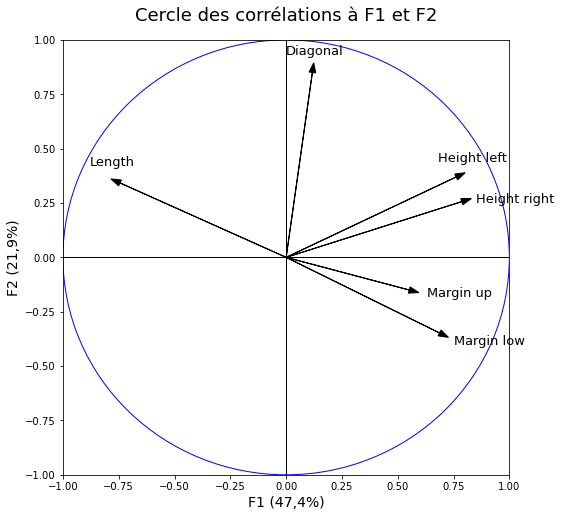

In [47]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for k in range(p):
    plt.arrow(0,0, cor_var[k,0], cor_var[k,1], length_includes_head=True, head_width=0.03, color='black')
    
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)

plt.text(-0.88, 0.42, 'Length', fontsize=13)
plt.text(0, 0.93, 'Diagonal', fontsize=13)
plt.text(0.63, -0.18, 'Margin up', fontsize=13)
plt.text(0.68, 0.44, 'Height left', fontsize=13)
plt.text(0.85, 0.25, 'Height right', fontsize=13)
plt.text(0.75, -0.4, 'Margin low', fontsize=13)
    
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.xlabel('F1 (47,4%)', fontsize=14)
plt.ylabel('F2 (21,9%)', fontsize=14)
plt.title('Cercle des corrélations à F1 et F2', fontsize=18, y=1.03)
plt.show()

In [48]:
# Retirer "diagonal" qui n'est pas corrélée à la variable cible (0.13 de corrélation)

## Informations du cercle à retenir

- Les variables les plus corrélées à F1 sont :
    - Height left
    - Height right 
    - Margin up
    - Margin Low
    - Length (négativement)


- Les variables les plus corrélées à F2 sont : 
    - Diagonal

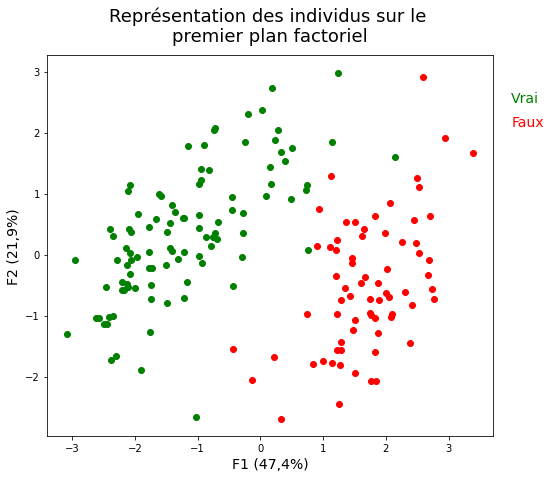

In [49]:
fig, axes = plt.subplots(figsize=(8,7))

for i in range(n):
    if df.loc[:,'is_genuine'][i]==True:
        plt.scatter(coord[i,0], coord[i,1], c='g')
    else:
        plt.scatter(coord[i,0], coord[i,1], c='r')

plt.xlabel('F1 (47,4%)', fontsize=14)
plt.ylabel('F2 (21,9%)', fontsize=14)
plt.text(4, 2.5, 'Vrai', c='g', fontsize=14)
plt.text(4, 2.1, 'Faux', c='r', fontsize=14)

plt.title('Représentation des individus sur le \npremier plan factoriel', fontsize=18, y=1.02)

plt.show()

## Remarques sur l'ACP

Le nuage des points est séparé en deux groupes nets, les vrais et les faux billets, avec la présence de quelques "fuites entre les deux".

Caractéristiques des vrais billets :

- Une longueur importante
- Une diagonale légèrement plus importante

Caractéristiques des faux billets : 

- Une marge haute importante
- Une marge basse importante
- Une hauteur gauche importante
- Une hauteur droite importante
- Une longueur faible


# Partition des données : K-Means

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [51]:
kmeans.fit(df_norm)

KMeans(n_clusters=2)

In [52]:
kmeans.cluster_centers_

array([[-0.06412378,  0.64653217,  0.72076527,  0.81585838,  0.64246416,
        -0.87782484],
       [ 0.05309173, -0.53530083, -0.59676264, -0.67549565, -0.53193269,
         0.72680122]])

In [53]:
kmeans.labels_

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Visualisation de la partition du K-Means sur l'ACP

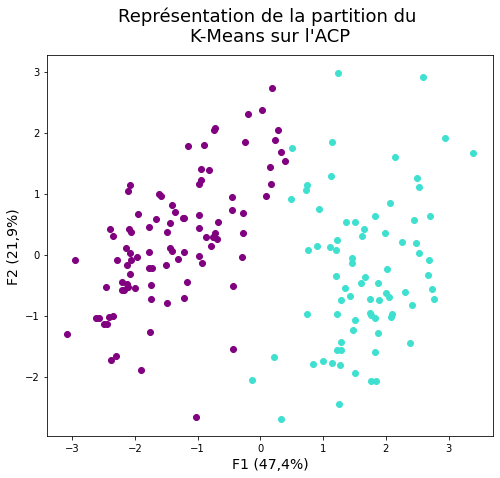

In [54]:
plt.figure(figsize=(8,7))

for i in range(n):
    if kmeans.labels_[i] == 0:
        plt.scatter(coord[i,0], coord[i,1], c='turquoise')
    else:
        plt.scatter(coord[i,0], coord[i,1], c='purple')

plt.xlabel('F1 (47,4%)', fontsize=14)
plt.ylabel('F2 (21,9%)', fontsize=14)

plt.title("Représentation de la partition du \nK-Means sur l'ACP", fontsize=18, y=1.02)

plt.show()

In [55]:
# Les points sont regroupés parfaitement et les fuites de l'ACP ont disparues. 

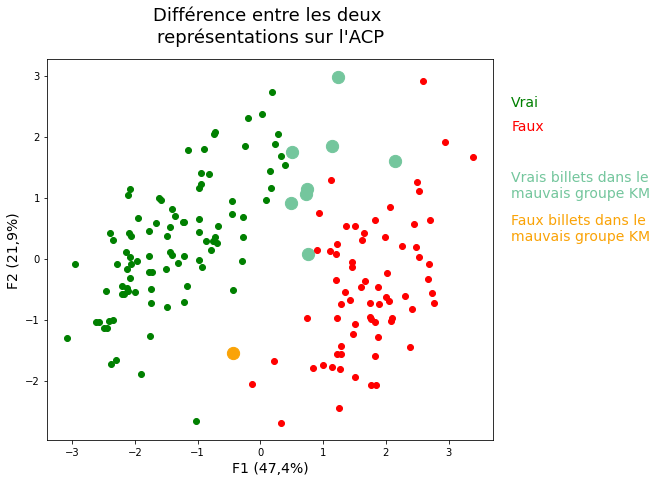

In [56]:
fig, axes = plt.subplots(figsize=(8,7))

diff_vrai = 0
diff_faux = 0

for i in range(n):
    if df.loc[:,'is_genuine'][i]==True:
        if kmeans.labels_[i] == 0:
            plt.scatter(coord[i,0], coord[i,1], c='#74c69d', s=150)
            diff_vrai += 1
        if kmeans.labels_[i] == 1:
            plt.scatter(coord[i,0], coord[i,1], c='g')
    else:
        if kmeans.labels_[i] == 0:
            plt.scatter(coord[i,0], coord[i,1], c='r')
        if kmeans.labels_[i] == 1:
            plt.scatter(coord[i,0], coord[i,1], c='#faa307', s=150)
            diff_faux += 1

plt.xlabel('F1 (47,4%)', fontsize=14)
plt.ylabel('F2 (21,9%)', fontsize=14)
plt.text(4, 2.5, 'Vrai', c='g', fontsize=14)
plt.text(4, 2.1, 'Faux', c='r', fontsize=14)
plt.text(4, 1, 'Vrais billets dans le \nmauvais groupe KM', c='#74c69d', fontsize=14)
plt.text(4, 0.3, 'Faux billets dans le \nmauvais groupe KM', c='#faa307', fontsize=14)

plt.title("Différence entre les deux \nreprésentations sur l'ACP", fontsize=18, y=1.03)

plt.show()

In [57]:
diff_vrai

8

In [58]:
precisionv = (n - diff_vrai) / n
precisionv

0.9529411764705882

In [59]:
precisionf = (n - diff_faux) / n
precisionf

0.9941176470588236

In [60]:
vrai = df.is_genuine.value_counts()[True]
faux = df.is_genuine.value_counts()[False]

In [61]:
vrai

100

In [62]:
confusion_matrix = pd.DataFrame({'Vrai ACP': [vrai - diff_vrai, diff_vrai],
                                'Faux ACP': [diff_faux, faux - diff_faux]}, index = 
                                ['Vrai KM', 'Faux KM'])
confusion_matrix

,Vrai ACP,Faux ACP
Vrai KM,92,1
Faux KM,8,69


In [63]:
vrai

100

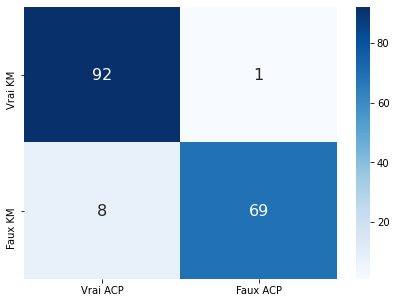

In [64]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix, cmap="Blues", annot=True, annot_kws={'fontsize':16}, fmt='g')
plt.show()

In [65]:
# Matrice de confusion pour vérifier le taux de bien classés, précision et sensibilité

## ACP sans la variable "Diagonal"

In [66]:
n2 = df.shape[0]
p2 = df.iloc[:, 2:].shape[1]

In [67]:
df_norm2 = sc.fit_transform(df.iloc[:, 2:])

In [68]:
acp2 = PCA(svd_solver = 'full')
coord2 = acp2.fit_transform(df_norm2)

In [69]:
acp2.components_

array([[ 0.46777359,  0.4873273 ,  0.44020606,  0.35605286, -0.47238222],
       [ 0.35800529,  0.34084788,  0.23534294, -0.75830715,  0.35389108],
       [-0.41315966, -0.34061242,  0.64033002, -0.3484412 , -0.42643695],
       [ 0.59658859, -0.51673602, -0.32994097, -0.26159652, -0.44695879],
       [ 0.35552951, -0.51312951,  0.48161057,  0.32916959,  0.51961092]])

In [70]:
var_axes2 = acp2.singular_values_**2/n
acp2.explained_variance_ratio_

array([0.56747118, 0.1747554 , 0.15729369, 0.06048131, 0.03999841])

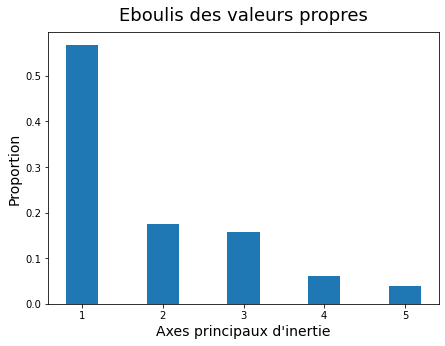

In [71]:
plt.figure(figsize=(7,5))
plt.bar([1, 2, 3, 4, 5], acp2.explained_variance_ratio_, width=0.4)
plt.title('Eboulis des valeurs propres', y=1.02, fontsize=18)
plt.xlabel("Axes principaux d'inertie", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.savefig('P6_08_eboulis.jpeg')
plt.show()

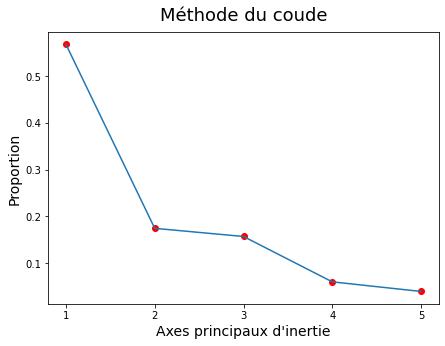

In [72]:
plt.figure(figsize=(7,5))
plt.plot([1, 2, 3, 4, 5], acp2.explained_variance_ratio_)
plt.scatter([1, 2, 3, 4, 5], acp2.explained_variance_ratio_, c='red')
plt.title('Méthode du coude', y=1.02, fontsize=18)
plt.xlabel("Axes principaux d'inertie", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.xticks([1, 2, 3, 4, 5])
plt.savefig('P6_09_coude.jpeg')
plt.show()

In [73]:
cor_var2 = np.zeros((p2,p2))

for k in range(p2):
    cor_var2[:, k] = acp2.components_[k, :] * np.sqrt(var_axes2[k])
    
print(cor_var2)

[[ 0.78793902  0.33464917 -0.36640261  0.32807304  0.15899448]
 [ 0.82087617  0.3186111  -0.3020655  -0.28416091 -0.22947395]
 [ 0.74150302  0.21998926  0.56786423 -0.1814395   0.21537853]
 [ 0.59975156 -0.7088355  -0.3090083  -0.14385586  0.1472062 ]
 [-0.795702    0.33080337 -0.37817732 -0.24578936  0.23237246]]


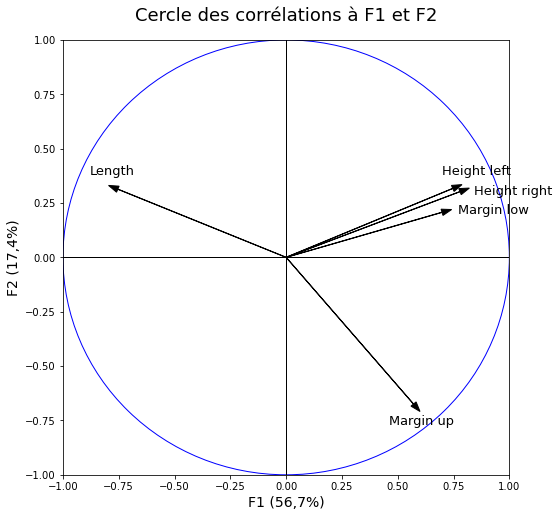

In [74]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for k in range(p2):
    plt.arrow(0,0, cor_var2[k,0], cor_var2[k,1], length_includes_head=True, head_width=0.03, color='black')
    
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)

plt.text(-0.88, 0.38, 'Length', fontsize=13)
plt.text(0.46, -0.77, 'Margin up', fontsize=13)
plt.text(0.7, 0.38, 'Height left', fontsize=13)
plt.text(0.84, 0.29, 'Height right', fontsize=13)
plt.text(0.77, 0.2, 'Margin low', fontsize=13)
    
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.xlabel('F1 (56,7%)', fontsize=14)
plt.ylabel('F2 (17,4%)', fontsize=14)
plt.title("Cercle des corrélations à F1 et F2", fontsize=18, y=1.03)
plt.savefig('P6_09_cercle_corr.jpeg')
plt.show()

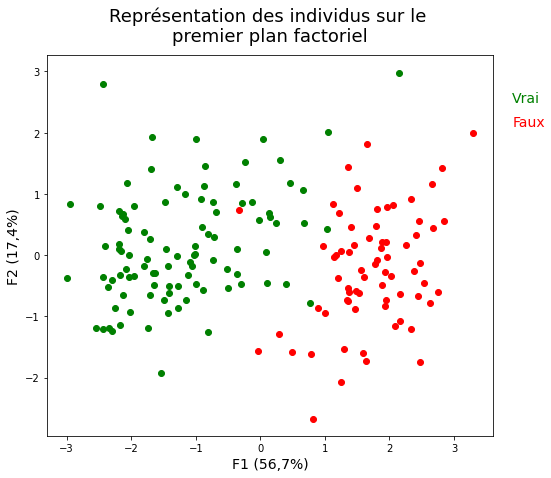

In [75]:
fig, axes = plt.subplots(figsize=(8,7))

for i in range(n2):
    if df.loc[:,'is_genuine'][i]==True:
        plt.scatter(coord2[i,0], coord2[i,1], c='g')
    else:
        plt.scatter(coord2[i,0], coord2[i,1], c='r')

plt.xlabel('F1 (56,7%)', fontsize=14)
plt.ylabel('F2 (17,4%)', fontsize=14)
plt.text(3.9, 2.5, 'Vrai', c='g', fontsize=14)
plt.text(3.9, 2.1, 'Faux', c='r', fontsize=14)

plt.title('Représentation des individus sur le \npremier plan factoriel', fontsize=18, y=1.02)
plt.savefig('P6_10_indiv_plan_fact.jpeg')

plt.show()

## K-Means

In [76]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(df_norm2)
kmeans2.cluster_centers_

array([[-0.55624228, -0.60759308, -0.68249457, -0.52570362,  0.73175793],
       [ 0.65608064,  0.71664824,  0.8049936 ,  0.62006068, -0.86309909]])

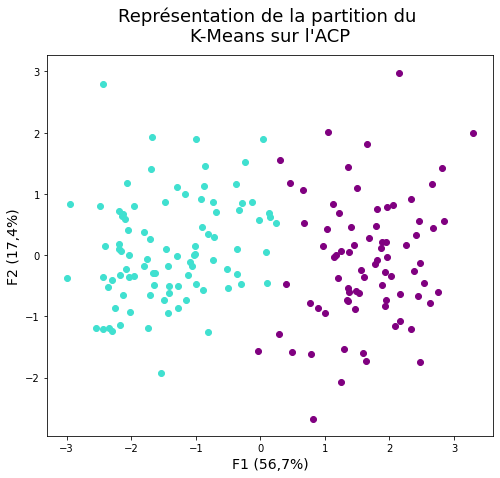

In [77]:
plt.figure(figsize=(8,7))

for i in range(n):
    if kmeans2.labels_[i] == 0:
        plt.scatter(coord2[i,0], coord2[i,1], c='turquoise')
    else:
        plt.scatter(coord2[i,0], coord2[i,1], c='purple')

plt.xlabel('F1 (56,7%)', fontsize=14)
plt.ylabel('F2 (17,4%)', fontsize=14)

plt.title("Représentation de la partition du \nK-Means sur l'ACP", fontsize=18, y=1.02)
plt.savefig('P6_11_kmeans_projete.jpeg')

plt.show()

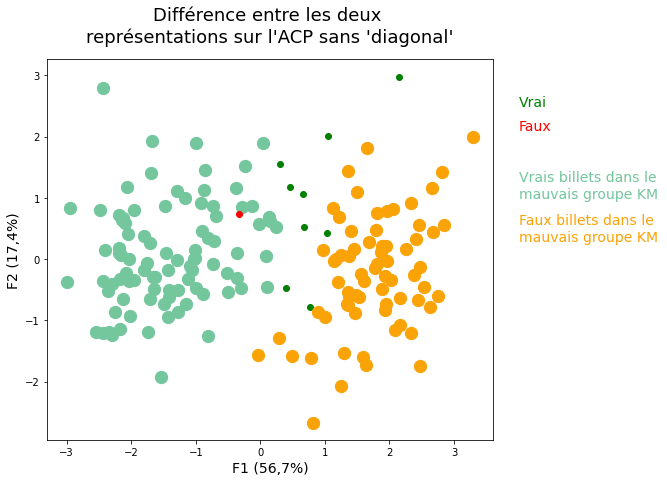

In [78]:
fig, axes = plt.subplots(figsize=(8,7))

diff_vrai2 = 0
diff_faux2 = 0

for i in range(n):
    if df.loc[:,'is_genuine'][i]==True:
        if kmeans2.labels_[i] == 0:
            plt.scatter(coord2[i,0], coord2[i,1], c='#74c69d', s=150)
            diff_vrai2 += 1
        if kmeans2.labels_[i] == 1:
            plt.scatter(coord2[i,0], coord2[i,1], c='g')
    else:
        if kmeans2.labels_[i] == 0:
            plt.scatter(coord2[i,0], coord2[i,1], c='r')
        if kmeans2.labels_[i] == 1:
            plt.scatter(coord2[i,0], coord2[i,1], c='#faa307', s=150)
            diff_faux2 += 1

plt.xlabel('F1 (56,7%)', fontsize=14)
plt.ylabel('F2 (17,4%)', fontsize=14)
plt.text(4, 2.5, 'Vrai', c='g', fontsize=14)
plt.text(4, 2.1, 'Faux', c='r', fontsize=14)
plt.text(4, 1, 'Vrais billets dans le \nmauvais groupe KM', c='#74c69d', fontsize=14)
plt.text(4, 0.3, 'Faux billets dans le \nmauvais groupe KM', c='#faa307', fontsize=14)

plt.title("Différence entre les deux \nreprésentations sur l'ACP sans 'diagonal'", fontsize=18, y=1.03)
plt.savefig('P6_12_diff_kmeans_acp.jpeg')

plt.show()

In [79]:
diff_vrai2

91

In [80]:
diff_faux2

69

In [81]:
precisionv_2 = (n - diff_vrai2) / n
precisionv_2

0.4647058823529412

In [82]:
precisionf_2 = (n - diff_faux2) / n
precisionf_2

0.5941176470588235

In [83]:
# Même précision du K-Means avec et sans la variable "diagonal"

In [84]:
confusion_matrix = pd.DataFrame({'Vrai ACP': [vrai - diff_vrai2, diff_vrai2],
                                'Faux ACP': [diff_faux2, faux - diff_faux2]}, index = 
                                ['Vrai KM', 'Faux KM'])
confusion_matrix

,Vrai ACP,Faux ACP
Vrai KM,9,69
Faux KM,91,1


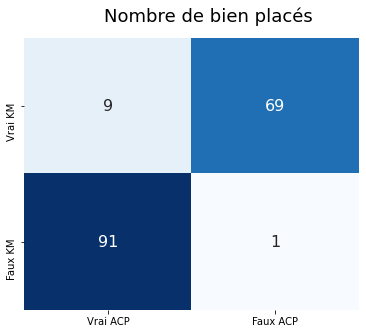

In [85]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix, cmap="Blues", annot=True, cbar=False, annot_kws={'fontsize':16}, fmt='g')
plt.title('Nombre de bien placés', fontsize=18, y=1.04, x=0.55)
plt.savefig('P6_13_confusion_map.jpeg')
plt.show()

In [86]:
69/70

0.9857142857142858

# Régression logistique

In [87]:
df_components = pd.DataFrame(coord2, columns = ['F1', 'F2', 'F3', 'F4', 'F5'])
df_components['is_genuine'] = df.is_genuine

In [88]:
df_components = df_components[['is_genuine', 'F1', 'F2']]
df_components.is_genuine = df_components.is_genuine.replace({True:1, False:0})

In [89]:
df_components.head()

,is_genuine,F1,F2
0,1,2.143117,2.982124
1,1,-2.051636,0.411908
2,1,-1.953085,0.808068
3,1,-2.035150,-0.359593
4,1,-2.432789,2.792122


In [90]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [91]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [92]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [93]:
reg_log = smf.glm('is_genuine~F1+F2',
                   data=df_components, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                            GLM   Df Residuals:                      167
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.858
Date:                Thu, 29 Jul 2021   Deviance:                       31.715
Time:                        22:33:00   Pearson chi2:                     182.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3546      0.797      2.954      0.0

In [94]:
# Les variables F1 et F2 sont significatives

# Régression logistique avec Scikit Learn

## Création d'un jeu de train et un jeu de test

In [95]:
x = df_components.drop('is_genuine', axis=1)
y = df_components.is_genuine

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

## Création du modèle de régression logistique

In [96]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Score du test

In [97]:
print('Test score :', round(model.score(x_test, y_test)*100, 2), '%')

Test score : 100.0 %


In [98]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [99]:
# 19 vrais, 15 faux 

In [100]:
np.array(y_test)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [101]:
# 20 vrais, 14 faux

In [102]:
confusion_matrix(y_pred, y_test)

array([[14,  0],
       [ 0, 20]], dtype=int64)

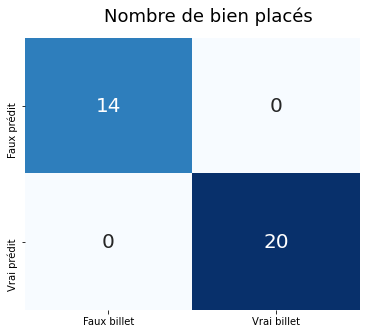

In [103]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_pred, y_test), cmap="Blues", annot=True, cbar=False 
            , annot_kws={'fontsize':20}, fmt='g', xticklabels = ['Faux billet', 'Vrai billet']
            , yticklabels = ['Faux prédit', 'Vrai prédit'])
plt.title('Nombre de bien placés', fontsize=18, y=1.04, x=0.55)
plt.savefig('P6_21_confusion_map.jpeg')
plt.show()

In [104]:
# Un vrai billet prédit faux

In [105]:
# 100 % des faux billets ont été correctement classés
# 19/20 = 95% des vrais billets ont été correctement classés

In [106]:
x_test.head()

,F1,F2
45,-2.249122,-0.870482
130,0.975293,0.142693
121,2.665814,1.165222
112,2.838282,0.550182
42,-2.195374,0.718953


## Algorithme de prédiction sur un nouveau dataset

In [107]:
def is_true(model, data):
    
    data_norm = sc.fit_transform(data.iloc[:, 1:-1])
    data_acp = acp2.transform(data_norm)
    df_acp = pd.DataFrame({'F1': [x[0] for x in data_acp], 'F2': [x[1] for x in data_acp]})
    d = {'Vrai/Faux': model.predict(df_acp), "Proba d'être vrai": 
        [round(x[1],3) for x in model.predict_proba(df_acp)]}
    result = pd.DataFrame(data = d, index = data.id)
    
    print('Faux : 0\nVrai : 1')
    return result

In [108]:
example = pd.read_csv('Fichiers CSV/example.csv')

In [109]:
example

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


## Résultats de la prédiction

In [110]:
is_true(model, example)

Faux : 0
Vrai : 1


,Vrai/Faux,Proba d'être vrai
id,,
A_1,0,0.450
A_2,0,0.169
A_3,0,0.020
A_4,1,0.994
A_5,1,1.000


In [111]:
test_notes = pd.read_csv('Fichiers CSV/test_notes.csv')

In [112]:
is_true(model, test_notes)

Faux : 0
Vrai : 1


,Vrai/Faux,Proba d'être vrai
id,,
B_1,1,0.999
B_2,0,0.415
B_3,1,0.995
B_4,0,0.011
B_5,1,0.517


In [115]:
test_notes

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5
